# ANN AND CONVOLUTIONS IN TENSOR FLOW

"ALL MACHINE LEARNING INTERFACES ARE THE SAME" The lazy programmer

In [400]:
# IMPORT ALL THE NECCESARY LIBRARYS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Read in Data

In [401]:
Features_data=pd.read_csv("x_train_gr_smpl.csv")

In [402]:
Features_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0
5,68.0,67.0,71.0,93.0,117.0,139.0,105.0,82.0,70.0,125.0,...,90.0,82.0,89.0,95.0,100.0,92.0,82.0,70.0,68.0,68.0
6,63.0,64.0,66.0,69.0,75.0,90.0,118.0,96.0,82.0,79.0,...,93.0,91.0,92.0,92.0,94.0,93.0,86.0,72.0,69.0,70.0
7,67.0,67.0,70.0,78.0,113.0,119.0,100.0,73.0,82.0,120.0,...,107.0,99.0,86.0,89.0,94.0,96.0,94.0,80.0,69.0,62.0
8,94.0,123.0,138.0,98.0,77.0,79.0,109.0,177.0,224.0,247.0,...,104.0,99.0,94.0,89.0,90.0,92.0,92.0,82.0,71.0,63.0
9,67.0,75.0,97.0,122.0,115.0,89.0,73.0,81.0,140.0,205.0,...,130.0,110.0,102.0,98.0,95.0,91.0,75.0,70.0,69.0,71.0


In [403]:
#Investigate the data at high level
#it seems okay 48 * 48 =2304
Features_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


Divide it by 225 for proper scaling

In [404]:
"""values are between 0 and 255, this will scale them to be between 0 and 1"""
scaled=Features_data/255
scaled.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.305882,0.301961,0.298039,0.321569,0.341176,0.360784,0.407843,0.466667,0.458824,0.470588,...,0.341176,0.309804,0.282353,0.298039,0.325490,0.372549,0.388235,0.384314,0.372549,0.368627
1,0.286275,0.294118,0.309804,0.305882,0.298039,0.294118,0.349020,0.419608,0.521569,0.490196,...,0.376471,0.364706,0.333333,0.301961,0.270588,0.286275,0.325490,0.392157,0.396078,0.396078
2,0.282353,0.294118,0.309804,0.301961,0.317647,0.349020,0.411765,0.427451,0.337255,0.352941,...,0.384314,0.372549,0.345098,0.313725,0.286275,0.278431,0.290196,0.313725,0.349020,0.372549
3,0.262745,0.274510,0.290196,0.313725,0.364706,0.419608,0.431373,0.376471,0.270588,0.392157,...,0.439216,0.360784,0.341176,0.321569,0.301961,0.282353,0.274510,0.282353,0.317647,0.345098
4,0.290196,0.290196,0.286275,0.282353,0.301961,0.341176,0.407843,0.427451,0.329412,0.325490,...,0.392157,0.384314,0.388235,0.392157,0.388235,0.349020,0.305882,0.258824,0.266667,0.282353
5,0.266667,0.262745,0.278431,0.364706,0.458824,0.545098,0.411765,0.321569,0.274510,0.490196,...,0.352941,0.321569,0.349020,0.372549,0.392157,0.360784,0.321569,0.274510,0.266667,0.266667
6,0.247059,0.250980,0.258824,0.270588,0.294118,0.352941,0.462745,0.376471,0.321569,0.309804,...,0.364706,0.356863,0.360784,0.360784,0.368627,0.364706,0.337255,0.282353,0.270588,0.274510
7,0.262745,0.262745,0.274510,0.305882,0.443137,0.466667,0.392157,0.286275,0.321569,0.470588,...,0.419608,0.388235,0.337255,0.349020,0.368627,0.376471,0.368627,0.313725,0.270588,0.243137
8,0.368627,0.482353,0.541176,0.384314,0.301961,0.309804,0.427451,0.694118,0.878431,0.968627,...,0.407843,0.388235,0.368627,0.349020,0.352941,0.360784,0.360784,0.321569,0.278431,0.247059
9,0.262745,0.294118,0.380392,0.478431,0.450980,0.349020,0.286275,0.317647,0.549020,0.803922,...,0.509804,0.431373,0.400000,0.384314,0.372549,0.356863,0.294118,0.274510,0.270588,0.278431


## Load in the Labels data

In [405]:
class_data=pd.read_csv("y_train_smpl.csv")
renamed_class_data=class_data.rename(columns={"0": "Class"})
class_data
npie=class_data.to_numpy()   #convert the data to numpy array
labels1=np.squeeze(npie)     # perfrom an transformation to fix the dimension to be suitable for CNN/ANN

In [406]:
Features=scaled.to_numpy() #Convert the input to numpy array

# Split the data 

In [407]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#define the feature vector

X_train, X_test, y_train, y_test = train_test_split( Features, labels1, test_size=0.2, random_state=0)



In [408]:
#Visualise 
X_train.shape

(7752, 2304)

# Import tensorflow

In [409]:

import tensorflow as tf
print(tf.__version__)

2.3.1


#  Build the model
The data is already flat so no need for the flatten layer

We have a dense layer representing the actual layer of the neural network

This will pform a linear transformation with 128 outputs using the  Relu activation 

Next we have a dropout regularisation with a  drop out probability of 20%

Finally we add the second layer ,another dense which ends with the softmax activatiojnn over the 10 output classes

In [410]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
Here we used adam for the optimiser

'Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.'

see this for more information of adam: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

Sparse categorical cross entropy for the loss: Use sparse categorical crossentropy when your classes are mutually exclusive



In [411]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model

In [412]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
243/243 [==============================] - 1s 3ms/step - loss: 1.7278 - accuracy: 0.3578 - val_loss: 1.5770 - val_accuracy: 0.3658
Epoch 2/50
243/243 [==============================] - 1s 3ms/step - loss: 1.3583 - accuracy: 0.5325 - val_loss: 1.1160 - val_accuracy: 0.6502
Epoch 3/50
243/243 [==============================] - 1s 3ms/step - loss: 1.1032 - accuracy: 0.6401 - val_loss: 0.9185 - val_accuracy: 0.7301
Epoch 4/50
243/243 [==============================] - 1s 3ms/step - loss: 0.9161 - accuracy: 0.7116 - val_loss: 0.7912 - val_accuracy: 0.7730
Epoch 5/50
243/243 [==============================] - 1s 3ms/step - loss: 0.7982 - accuracy: 0.7514 - val_loss: 0.6754 - val_accuracy: 0.7900
Epoch 6/50
243/243 [==============================] - 1s 3ms/step - loss: 0.6985 - accuracy: 0.7883 - val_loss: 0.5729 - val_accuracy: 0.8627
Epoch 7/50
243/243 [==============================] - 1s 3ms/step - loss: 0.6341 - accuracy: 0.8061 - val_loss: 0.5496 - val_accuracy: 0.8519
Epoch 

In [413]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 128)               295040    
_________________________________________________________________
dropout_119 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_120 (Dense)            (None, 10)                1290      
Total params: 296,330
Trainable params: 296,330
Non-trainable params: 0
_________________________________________________________________


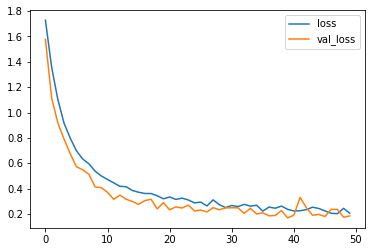

In [414]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

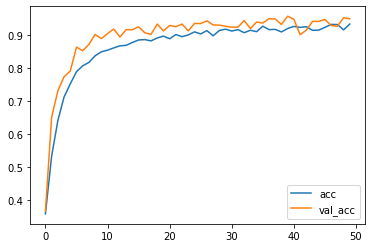

In [415]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [416]:
print(model.evaluate(X_test, y_test))

61/61 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.9484
[0.18574993312358856, 0.9484004378318787]


Confusion matrix, without normalization
[[ 40   3   0   0   0   0   0   0   0   0]
 [  0 389  19   2   4   0   0   1   1   0]
 [  0  13 443   1   2   0   0   0   0   0]
 [  0   7   4 271   1   0   0   0   0   1]
 [  1  11   6   0 375   0   2   0   0   0]
 [  0   0   0   0   0  50   0   1   0   3]
 [  0   0   1   0   4   0  78   0   0   1]
 [  0   0   0   0   0   0   1  43   0   1]
 [  0   0   1   1   0   1   1   0 109   0]
 [  0   0   0   0   1   0   1   0   3  40]]


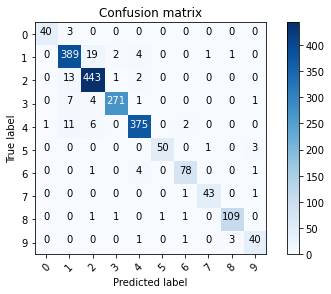

In [417]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?


In [418]:
X_test.shape   #Shape not suitable for visualising

(1938, 2304)

In [419]:
X_test=X_test.reshape(1938,48,48)  # reshape

# Check the misclassifications randomly

The results are quite interesting

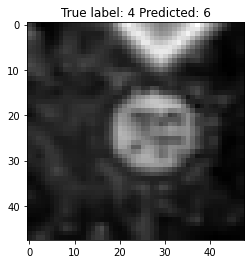

In [420]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

# PART 2 CNN

In [421]:
#Shape not suitable for a convultion
X_train.shape

(7752, 2304)

In [422]:
R=X_train.shape[0]

In [423]:
X_train=X_train.reshape(R,48,48)

## Think of the above process As a reverse flattening

In [424]:
X_train.shape

(7752, 48, 48)

In [425]:
X_test.shape

(1938, 48, 48)

In [426]:
X_test=X_test.reshape(1938,48,48)
X_test.shape

(1938, 48, 48)

# MODIFY DATA FURTHER FOR A CONVOLUTIONAL NETWORK

## Note tha for an ANN the first operation we did was flatten but for cnn it expects a 3 dimension input so we need hieght by with by color

In order to achieve the above we add 1 in the last dimension

In [427]:
# the data is only 2D!
# convolution expects height x width x color
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(7752, 48, 48, 1)


# Imports

In [428]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [429]:
# We get the number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


  # Model Building
  
  ### First we have our 3 convolution layers
  
  ### Constant size filter 3 by 3
  
  ### We use a stride of 2 so that image dimensions get reduced by half after each convolution
  
  
  ### Relu ActivTION
  
  ### Final activation is softmax

In [430]:
# Build the model using the functional API
i = Input(shape=X_train[0].shape)                          #
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)   # converts image into a feature vector
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)   # k output points

model = Model(i, x)

In [431]:
y_test.shape

(1938,)

In [432]:
# Compile and fit
#make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
243/243 [==============================] - 6s 24ms/step - loss: 1.0052 - accuracy: 0.6351 - val_loss: 0.3136 - val_accuracy: 0.9025
Epoch 2/15
243/243 [==============================] - 6s 24ms/step - loss: 0.2147 - accuracy: 0.9294 - val_loss: 0.1254 - val_accuracy: 0.9659
Epoch 3/15
243/243 [==============================] - 6s 24ms/step - loss: 0.1029 - accuracy: 0.9676 - val_loss: 0.1099 - val_accuracy: 0.9654
Epoch 4/15
243/243 [==============================] - 6s 24ms/step - loss: 0.0673 - accuracy: 0.9801 - val_loss: 0.0976 - val_accuracy: 0.9732
Epoch 5/15
243/243 [==============================] - 6s 24ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.1011 - val_accuracy: 0.9727
Epoch 6/15
243/243 [==============================] - 6s 24ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0764 - val_accuracy: 0.9799
Epoch 7/15
243/243 [==============================] - 6s 24ms/step - loss: 0.0402 - accuracy: 0.9877 - val_loss: 0.1388 - val_accuracy: 0.9592

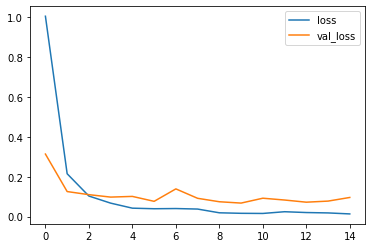

In [433]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

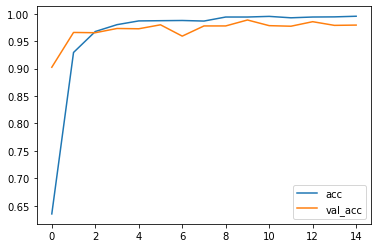

In [434]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 42   0   1   0   0   0   0   0   0   0]
 [  0 406   7   0   1   0   1   0   1   0]
 [  0   5 453   1   0   0   0   0   0   0]
 [  0   0   0 283   0   0   1   0   0   0]
 [  2   7   3   0 383   0   0   0   0   0]
 [  0   0   0   0   0  52   0   0   0   2]
 [  0   0   0   0   1   0  83   0   0   0]
 [  0   0   0   0   0   0   3  41   1   0]
 [  0   0   0   0   0   1   0   0 112   0]
 [  0   0   0   1   0   0   0   0   1  43]]


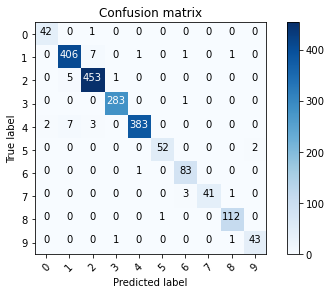

In [435]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [436]:
X_test.shape

(1938, 48, 48, 1)

# Class label Meaning

0 speed limit 20

1 speed limit 30

2 speed limit 50

3 speed limit 60

4 speed limit 70

5 left turn

6 right turn

7 beware pedestrian crossing

8 beware children

9 beware cycle route ahead

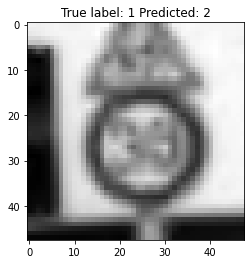

In [437]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(48,48), cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [438]:
model.summary()

Model: "functional_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 23, 23, 32)        320       
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 5, 5, 128)         73856     
_________________________________________________________________
flatten_59 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dropout_120 (Dropout)        (None, 3200)              0         
_________________________________________________________________
dense_121 (Dense)            (None, 512)            

# Evaluate on unseen Data

In [439]:
Test_features=pd.read_csv("x_test_gr_smpl.csv")


Test_features=Test_features/255


In [440]:
y_test_new=pd.read_csv("y_test_smpl.csv")
npie=y_test_new.to_numpy()   #convert the data to numpy array
labels_test_new=np.squeeze(npie) 
labels_test

array([1, 4, 6, ..., 3, 1, 0], dtype=int64)

In [441]:
Test_features=Test_features.to_numpy()

In [442]:
Test_features=Test_features.reshape(3090,48,48)

In [443]:
test_features = np.expand_dims(Test_features, -1)

In [444]:
test_features.shape

(3090, 48, 48, 1)

In [445]:
print(model.evaluate(test_features, labels_test))

97/97 [==============================] - 1s 6ms/step - loss: 0.2765 - accuracy: 0.9557
[0.27651965618133545, 0.9556634426116943]


# 4000 LESS INSTANCES IN TRAINING

In [513]:
X_train_4000less=pd.read_csv("Train_Dataset_4000.csv")
X_train_4000less[['Class']] = X_train_4000less[['Class']].replace( ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'],[0, 1, 2,3,4,5,6,7,8,9])

In [514]:
y_train_400less=X_train_4000less[['Class']]
npie=y_train_400less.to_numpy()   #convert the data to numpy array
labels1=np.squeeze(npie) 

Drop last collumn

In [515]:
X_train_4000less=X_train_4000less.drop('Class',axis=1)
X_train_4000less=X_train_4000less/255
X_train_4000less.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.125490,0.211765,0.266667,0.309804,0.313725,0.309804,0.243137,0.164706,0.137255,0.137255,...,0.227451,0.219608,0.219608,0.215686,0.227451,0.235294,0.235294,0.227451,0.211765,0.223529
1,0.070588,0.070588,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,...,0.043137,0.043137,0.043137,0.043137,0.043137,0.047059,0.047059,0.043137,0.043137,0.047059
2,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.058824,...,0.070588,0.070588,0.070588,0.070588,0.105882,0.133333,0.156863,0.145098,0.121569,0.105882
3,0.835294,0.929412,0.937255,0.945098,0.721569,0.403922,0.337255,0.294118,0.454902,0.611765,...,0.164706,0.192157,0.223529,0.203922,0.258824,0.325490,0.298039,0.262745,0.341176,0.435294
4,0.650980,0.392157,0.419608,0.372549,0.368627,0.254902,0.321569,0.341176,0.337255,0.337255,...,0.349020,0.235294,0.250980,0.321569,0.396078,0.478431,0.564706,0.294118,0.243137,0.290196


In [516]:
X_train, X_test, y_train, y_test = train_test_split( X_train_4000less, labels1, test_size=0.2, random_state=0)

In [517]:
X_train=X_train.to_numpy()
X_train.shape

(4552, 2304)

In [518]:
X_train=X_train.reshape(4552,48,48)
X_train = np.expand_dims(X_train, -1)

In [519]:
X_test=X_test.to_numpy()
X_test=X_test.reshape(1138,48,48)

In [520]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r4000 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
143/143 [==============================] - 4s 26ms/step - loss: 0.0179 - accuracy: 0.9952 - val_loss: 0.0174 - val_accuracy: 0.9938
Epoch 2/15
143/143 [==============================] - 3s 24ms/step - loss: 0.0179 - accuracy: 0.9976 - val_loss: 0.0203 - val_accuracy: 0.9947
Epoch 3/15
143/143 [==============================] - 3s 24ms/step - loss: 0.0048 - accuracy: 0.9976 - val_loss: 0.0289 - val_accuracy: 0.9938
Epoch 4/15
143/143 [==============================] - 3s 24ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0204 - val_accuracy: 0.9938
Epoch 5/15
143/143 [==============================] - 3s 24ms/step - loss: 0.0104 - accuracy: 0.9976 - val_loss: 0.0658 - val_accuracy: 0.9815
Epoch 6/15
143/143 [==============================] - 3s 24ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0279 - val_accuracy: 0.9947
Epoch 7/15
143/143 [==============================] - 4s 24ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0395 - val_accuracy: 0.9921

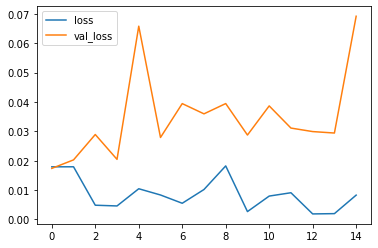

In [521]:
import matplotlib.pyplot as plt
plt.plot(r4000.history['loss'], label='loss')
plt.plot(r4000.history['val_loss'], label='val_loss')
plt.legend()

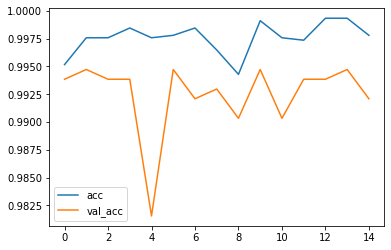

In [522]:
# Plot accuracy per iteration
plt.plot(r4000.history['accuracy'], label='acc')
plt.plot(r4000.history['val_accuracy'], label='val_acc')
plt.legend()

Evaluate

In [523]:
Test_4000=pd.read_csv('Test_Dataset_4000.csv')
Test_4000[['Class']] = Test_4000[['Class']].replace( ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'],[0, 1, 2,3,4,5,6,7,8,9])
Test_4000.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,22.0,23.0,24.0,24.0,24.0,22.0,20.0,24.0,25.0,26.0,...,24.0,24.0,24.0,24.0,24.0,24.0,23.0,23.0,22.0,2
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,200.0,226.0,243.0,253.0,246.0,240.0,249.0,247.0,242.0,6
2,173.0,187.0,168.0,118.0,63.0,118.0,107.0,131.0,164.0,119.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,4
3,52.0,52.0,54.0,57.0,59.0,60.0,61.0,58.0,57.0,56.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
4,235.0,156.0,121.0,70.0,44.0,66.0,86.0,94.0,106.0,110.0,...,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,254.0,1


In [524]:
Data400_plus_test=Test_4000[['Class']]
Data400_plus_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7090 entries, 0 to 7089
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   7090 non-null   int64
dtypes: int64(1)
memory usage: 55.5 KB


In [525]:
Test_4000=Test_4000.drop('Class',axis=1)
Test_4000=Test_4000/255
Test_4000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7090 entries, 0 to 7089
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 124.6 MB


In [526]:
numpie=Data400_plus_test.to_numpy()   #convert the data to numpy array
numpie.shape

(7090, 1)

In [527]:
labels_test_new=np.squeeze(numpie) 
labels_test_new

array([2, 6, 4, ..., 6, 2, 4], dtype=int64)

In [528]:
labels_test_new.shape

(7090,)

In [529]:
Test_4000=Test_4000.to_numpy()

In [530]:
Test_4000=Test_4000.reshape(7090,48,48)

In [531]:
Test_4000 = np.expand_dims(Test_4000, -1)

In [532]:
print(model.evaluate(Test_4000, labels_test_new))

222/222 [==============================] - 1s 6ms/step - loss: 0.1203 - accuracy: 0.9795
[0.12029722332954407, 0.9795486330986023]


In [533]:
raw=model.predict(Test_4000,verbose=0)
pred=[]
for result in raw:
    value=np.argmax(result)
    pred.append(value)
    

In [534]:
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(list(labels_test_new), pred)))

Classification report for classifier <tensorflow.python.keras.engine.functional.Functional object at 0x000002049AD55430>:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       144
           1       0.99      0.97      0.98      1634
           2       0.97      0.99      0.98      1691
           3       0.98      0.99      0.99      1036
           4       0.98      0.98      0.98      1474
           5       0.99      0.99      0.99       145
           6       0.95      0.99      0.97       242
           7       0.99      0.96      0.98       146
           8       1.00      0.97      0.98       376
           9       0.93      0.99      0.96       202

    accuracy                           0.98      7090
   macro avg       0.98      0.97      0.97      7090
weighted avg       0.98      0.98      0.98      7090




Confusion matrix, without normalization
[[ 127    1    0    0   14    0    1    0    0    1]
 [   0 1586   30    1    9    0    7    0    1    0]
 [   0    6 1672   12    1    0    0    0    0    0]
 [   0    0    7 1027    1    0    0    0    0    1]
 [   0    3   19    2 1447    0    0    0    0    3]
 [   0    0    0    0    0  143    2    0    0    0]
 [   0    0    0    0    2    0  239    0    0    1]
 [   0    5    0    0    0    0    0  140    0    1]
 [   0    0    1    0    0    1    2    1  364    7]
 [   0    0    0    1    0    0    1    0    0  200]]


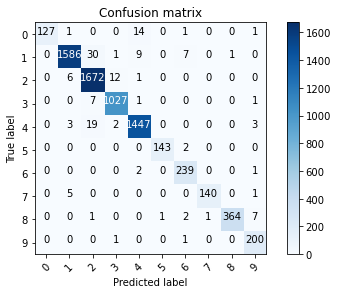

In [535]:
#p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(labels_test_new, pred)
plot_confusion_matrix(cm, list(range(10)))

# Class label Meaning

0 speed limit 20

1 speed limit 30

2 speed limit 50

3 speed limit 60

4 speed limit 70

5 left turn

6 right turn

7 beware pedestrian crossing

8 beware children

9 beware cycle route ahead

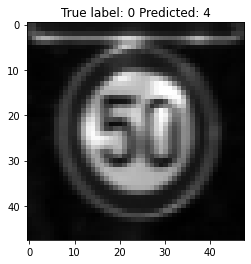

In [537]:
misclassified_idx = np.where(pred != labels_test_new)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(Test_9000[i].reshape(48,48), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels_test_new[i], pred[i]));

# 9000 LESS INSTANCES

In [466]:
X_train_9000less=pd.read_csv("Train_Dataset_9000.csv")
X_train_9000less[['Class']] = X_train_9000less[['Class']].replace( ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'],[0, 1, 2,3,4,5,6,7,8,9])

In [509]:
X_train_9000less.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 12.1 MB


In [467]:
y_train_9000less=X_train_9000less[['Class']]
npie=y_train_9000less.to_numpy()   #convert the data to numpy array
labels1=np.squeeze(npie) 

Drop last collumn

In [468]:
X_train_9000less=X_train_9000less.drop('Class',axis=1)
X_train_9000less=X_train_9000less/255
X_train_9000less.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.125490,0.211765,0.266667,0.309804,0.313725,0.309804,0.243137,0.164706,0.137255,0.137255,...,0.227451,0.219608,0.219608,0.215686,0.227451,0.235294,0.235294,0.227451,0.211765,0.223529
1,0.070588,0.070588,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,...,0.043137,0.043137,0.043137,0.043137,0.043137,0.047059,0.047059,0.043137,0.043137,0.047059
2,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.058824,...,0.070588,0.070588,0.070588,0.070588,0.105882,0.133333,0.156863,0.145098,0.121569,0.105882
3,0.835294,0.929412,0.937255,0.945098,0.721569,0.403922,0.337255,0.294118,0.454902,0.611765,...,0.164706,0.192157,0.223529,0.203922,0.258824,0.325490,0.298039,0.262745,0.341176,0.435294
4,0.650980,0.392157,0.419608,0.372549,0.368627,0.254902,0.321569,0.341176,0.337255,0.337255,...,0.349020,0.235294,0.250980,0.321569,0.396078,0.478431,0.564706,0.294118,0.243137,0.290196


In [469]:
X_train, X_test, y_train, y_test = train_test_split( X_train_9000less, labels1, test_size=0.2, random_state=0)

In [470]:
X_train=X_train.to_numpy()
X_train.shape

(552, 2304)

In [471]:
X_train=X_train.reshape(552,48,48)
X_train = np.expand_dims(X_train, -1)

In [472]:
X_test=X_test.to_numpy()
X_test=X_test.reshape(138,48,48)

In [474]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r9000 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
18/18 [==============================] - 1s 33ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0981 - val_accuracy: 0.9855
Epoch 2/15
18/18 [==============================] - 0s 25ms/step - loss: 7.6030e-05 - accuracy: 1.0000 - val_loss: 0.1497 - val_accuracy: 0.9855
Epoch 3/15
18/18 [==============================] - 0s 26ms/step - loss: 4.0680e-04 - accuracy: 1.0000 - val_loss: 0.0934 - val_accuracy: 0.9855
Epoch 4/15
18/18 [==============================] - 0s 23ms/step - loss: 0.0101 - accuracy: 0.9982 - val_loss: 0.1182 - val_accuracy: 0.9855
Epoch 5/15
18/18 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1089 - val_accuracy: 0.9855
Epoch 6/15
18/18 [==============================] - 0s 23ms/step - loss: 1.9936e-04 - accuracy: 1.0000 - val_loss: 0.1519 - val_accuracy: 0.9855
Epoch 7/15
18/18 [==============================] - 0s 24ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1453 - val_accuracy: 0.9783
E

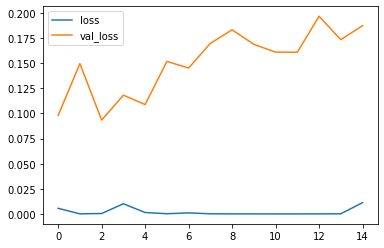

In [475]:
import matplotlib.pyplot as plt
plt.plot(r9000.history['loss'], label='loss')
plt.plot(r9000.history['val_loss'], label='val_loss')
plt.legend()

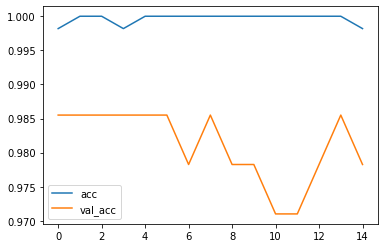

In [476]:
# Plot accuracy per iteration
plt.plot(r9000.history['accuracy'], label='acc')
plt.plot(r9000.history['val_accuracy'], label='val_acc')
plt.legend()

Evaluate

In [477]:
Test_9000=pd.read_csv('Test_Dataset_9000.csv')
Test_9000[['Class']] = Test_9000[['Class']].replace( ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'],[0, 1, 2,3,4,5,6,7,8,9])
Test_9000.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,65.0,52.0,58.0,67.0,52.0,64.0,58.0,49.0,56.0,61.0,...,38.0,55.0,70.0,83.0,74.0,55.0,72.0,73.0,77.0,1
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,130.0,46.0,42.0,31.0,26.0,25.0,26.0,1
2,35.0,35.0,35.0,34.0,34.0,35.0,36.0,38.0,42.0,44.0,...,60.0,61.0,52.0,44.0,39.0,33.0,27.0,30.0,32.0,2
3,98.0,97.0,92.0,80.0,82.0,83.0,84.0,86.0,85.0,85.0,...,15.0,14.0,14.0,14.0,14.0,15.0,15.0,15.0,15.0,4
4,255.0,255.0,255.0,255.0,251.0,225.0,232.0,252.0,247.0,254.0,...,251.0,249.0,247.0,247.0,245.0,206.0,87.0,46.0,47.0,8


In [478]:
Data9000_plus_test=Test_9000[['Class']]
Data9000_plus_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   9000 non-null   int64
dtypes: int64(1)
memory usage: 70.4 KB


In [479]:
Test_9000=Test_9000.drop('Class',axis=1)
Test_9000=Test_9000/255
Test_9000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 158.2 MB


In [480]:
numpie=Data9000_plus_test.to_numpy()   #convert the data to numpy array
numpie.shape

(9000, 1)

In [481]:
labels_test_new=np.squeeze(numpie) 
labels_test_new

array([1, 1, 2, ..., 1, 4, 3], dtype=int64)

In [482]:
labels_test_new.shape

(9000,)

In [483]:
Test_9000=Test_9000.to_numpy()

In [484]:
Test_9000=Test_9000.reshape(9000,48,48)

In [485]:
Test_9000 = np.expand_dims(Test_9000, -1)

In [510]:
print(model.evaluate(Test_9000, labels_test_new))

282/282 [==============================] - 2s 6ms/step - loss: 0.0390 - accuracy: 0.9917
[0.03904392942786217, 0.9916666746139526]


In [492]:
raw=model.predict(Test_9000,verbose=0)
pred=[]
for result in raw:
    value=np.argmax(result)
    pred.append(value)
    

In [501]:
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(list(labels_test_new), pred)))


Classification report for classifier <tensorflow.python.keras.engine.functional.Functional object at 0x000002049AD55430>:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       192
           1       1.00      0.99      0.99      2063
           2       0.99      0.99      0.99      2089
           3       0.99      0.99      0.99      1308
           4       1.00      1.00      1.00      1838
           5       0.92      1.00      0.96       195
           6       0.99      0.99      0.99       336
           7       1.00      1.00      1.00       219
           8       0.99      0.99      0.99       508
           9       1.00      0.97      0.99       252

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000




Confusion matrix, without normalization
[[ 191    0    0    1    0    0    0    0    0    0]
 [   0 2033   15    5    7    1    1    0    1    0]
 [   0    5 2076    7    1    0    0    0    0    0]
 [   0    0    0 1298    0    7    1    0    2    0]
 [   0    2    6    0 1830    0    0    0    0    0]
 [   0    0    0    0    0  195    0    0    0    0]
 [   0    1    0    0    1    0  334    0    0    0]
 [   0    0    0    0    0    1    0  218    0    0]
 [   0    0    0    0    0    3    0    0  505    0]
 [   0    0    0    1    0    6    0    0    0  245]]


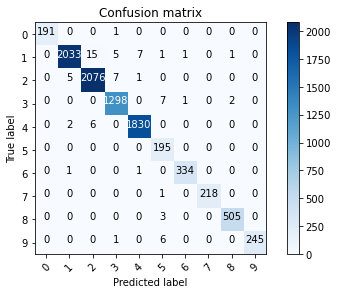

In [502]:
#p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(labels_test_new, pred)
plot_confusion_matrix(cm, list(range(10)))

# Class label Meaning

0 speed limit 20

1 speed limit 30

2 speed limit 50

3 speed limit 60

4 speed limit 70

5 left turn

6 right turn

7 beware pedestrian crossing

8 beware children

9 beware cycle route ahead

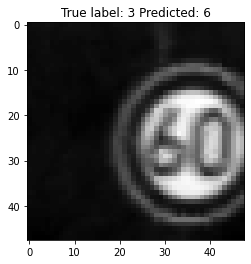

In [508]:
misclassified_idx = np.where(pred != labels_test_new)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(Test_9000[i].reshape(48,48), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels_test_new[i], pred[i]));

# dont run unless gpu

# Data Augumentation And Batch Normalisation

It is possible that positioning caused some erros in the learning of the neural net. Perhaps we can help the neural network learn better this notion of transalational invariance  using data augumentation.

Thi is basically inventing new data

In [77]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization

In [78]:
# Build the model using the functional API
i = Input(shape=X_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [79]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
243/243 [==============================] - 76s 312ms/step - loss: 1.6018 - accuracy: 0.6415 - val_loss: 2.1424 - val_accuracy: 0.3117
Epoch 2/50
243/243 [==============================] - 76s 312ms/step - loss: 0.0826 - accuracy: 0.9717 - val_loss: 0.4969 - val_accuracy: 0.9009
Epoch 3/50
243/243 [==============================] - 76s 313ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.2583 - val_accuracy: 0.9381
Epoch 4/50
243/243 [==============================] - 76s 315ms/step - loss: 0.0703 - accuracy: 0.9813 - val_loss: 0.2219 - val_accuracy: 0.9376
Epoch 5/50
243/243 [==============================] - 77s 317ms/step - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0338 - val_accuracy: 0.9917
Epoch 6/50
243/243 [==============================] - 76s 314ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.3733 - val_accuracy: 0.9391
Epoch 7/50
243/243 [==============================] - 77s 316ms/step - loss: 0.0214 - accuracy: 0.9946 - val_loss: 0.0612 - val_ac

KeyboardInterrupt: 

In [81]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
242/242 [==============================] - 77s 319ms/step - loss: 0.7219 - accuracy: 0.8499 - val_loss: 0.0664 - val_accuracy: 0.9701
Epoch 2/50
 34/242 [===>..........................] - ETA: 1:02 - loss: 0.1808 - accuracy: 0.9467

KeyboardInterrupt: 

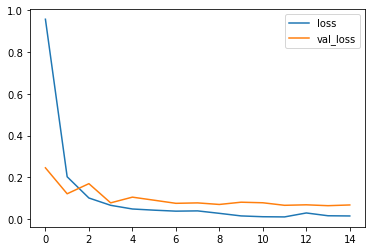

In [82]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

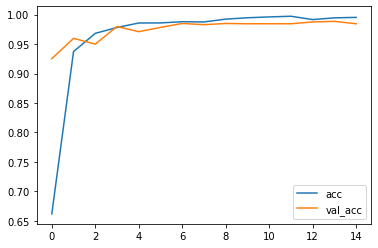

In [83]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [100]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

ValueError: in user code:

    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\kumug\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer conv2d_148 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 2304]


#  Investigation for Coursework

## Degree of freedom

Degree of freedom in machine learning refers to the number of parameters in the model.The concern is that the more the number of control point the more the model would not be able to generalise i.e Higher chance to overfit.


Deep learning models usually have more parameters than the sample and are prone to overfiting but there are regularisation techniques such as drop out that help deal with this problem.

In deep networks the degree of freedome is generally lower  than the number of parameters:  Deeper networks tend to have lower degrees of freedom

for more info: https://machinelearningmastery.com/degrees-of-freedom-in-machine-learning/#:~:text=In%20machine%20learning%2C%20the%20degrees,a%20deep%20learning%20neural%20network.&text=In%20statistics%2C%20degrees%20of%20freedom,used%20to%20calculate%20a%20statistic.

Futher reading: https://arxiv.org/abs/1603.09260
                
                https://arxiv.org/abs/1312.7851
                
                https://amzn.to/37ChU3k
                
                https://amzn.to/2O3BuOa
                
                https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)

## Size of Training Set

There are two cases: 

A model with too little capacity ---> This will not learn the data too well

A model with too much capacity  -----> This may learn the data too well and overfit 

In both of the above cases it means the model will not generalise too well.
As an Approach to tackle both of this worlds a larger model with regularisation may be with to keep the weight as small as possible. It will not only curb the problem of generalisation but also results in faster convergence.

SUGGESTED APRROACHES TO BE INVESTIGATED HERE:

Regularisation method like weight decay

Early stopping with with drop out and weight constraint.

#  Adapting the above model to add K fold Cross Validation

In [140]:
#Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
from sklearn.model_selection import KFold
import numpy as np

## Configuration value

In [141]:
num_folds = 10

# Make sure data is Normalised

In [142]:
scaled=Features_data/255
scaled.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.305882,0.301961,0.298039,0.321569,0.341176,0.360784,0.407843,0.466667,0.458824,0.470588,...,0.341176,0.309804,0.282353,0.298039,0.325490,0.372549,0.388235,0.384314,0.372549,0.368627
1,0.286275,0.294118,0.309804,0.305882,0.298039,0.294118,0.349020,0.419608,0.521569,0.490196,...,0.376471,0.364706,0.333333,0.301961,0.270588,0.286275,0.325490,0.392157,0.396078,0.396078
2,0.282353,0.294118,0.309804,0.301961,0.317647,0.349020,0.411765,0.427451,0.337255,0.352941,...,0.384314,0.372549,0.345098,0.313725,0.286275,0.278431,0.290196,0.313725,0.349020,0.372549
3,0.262745,0.274510,0.290196,0.313725,0.364706,0.419608,0.431373,0.376471,0.270588,0.392157,...,0.439216,0.360784,0.341176,0.321569,0.301961,0.282353,0.274510,0.282353,0.317647,0.345098
4,0.290196,0.290196,0.286275,0.282353,0.301961,0.341176,0.407843,0.427451,0.329412,0.325490,...,0.392157,0.384314,0.388235,0.392157,0.388235,0.349020,0.305882,0.258824,0.266667,0.282353
5,0.266667,0.262745,0.278431,0.364706,0.458824,0.545098,0.411765,0.321569,0.274510,0.490196,...,0.352941,0.321569,0.349020,0.372549,0.392157,0.360784,0.321569,0.274510,0.266667,0.266667
6,0.247059,0.250980,0.258824,0.270588,0.294118,0.352941,0.462745,0.376471,0.321569,0.309804,...,0.364706,0.356863,0.360784,0.360784,0.368627,0.364706,0.337255,0.282353,0.270588,0.274510
7,0.262745,0.262745,0.274510,0.305882,0.443137,0.466667,0.392157,0.286275,0.321569,0.470588,...,0.419608,0.388235,0.337255,0.349020,0.368627,0.376471,0.368627,0.313725,0.270588,0.243137
8,0.368627,0.482353,0.541176,0.384314,0.301961,0.309804,0.427451,0.694118,0.878431,0.968627,...,0.407843,0.388235,0.368627,0.349020,0.352941,0.360784,0.360784,0.321569,0.278431,0.247059
9,0.262745,0.294118,0.380392,0.478431,0.450980,0.349020,0.286275,0.317647,0.549020,0.803922,...,0.509804,0.431373,0.400000,0.384314,0.372549,0.356863,0.294118,0.274510,0.270588,0.278431


In [143]:
# Define per-fold score containers 
acc_per_fold = []
loss_per_fold = []
kfold = KFold(n_splits=num_folds, shuffle=True)

In [144]:
scaled.shape

(9690, 2304)

In [145]:
Features_modified=Features.reshape(9690,48,48)
train_data = np.expand_dims(Features_modified, -1)

print(train_data.shape)

(9690, 48, 48, 1)


In [146]:
K = len(set(labels1))
print("number of classes:", K)

number of classes: 10


In [147]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(scaled, labels1):
  print(train.shape,test.shape)
  # Define the model architecture
  i = Input(shape=train_data[0].shape)                          #
  x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
  x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
  x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
  x = Flatten()(x)   # converts image into a feature vector
  x = Dropout(0.2)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(K, activation='softmax')(x)   # k output points

  model = Model(i, x)

  # Compile the model
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  r = model.fit(train_data[train], labels1[train], epochs=15)
  

  scores = model.evaluate(train_data[test], labels1[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  # Increase fold number
  fold_no = fold_no + 1


(8721,) (969,)
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
273/273 [==============================] - 7s 26ms/step - loss: 0.8849 - accuracy: 0.6879
Epoch 2/15
273/273 [==============================] - 7s 26ms/step - loss: 0.1866 - accuracy: 0.9428
Epoch 3/15
273/273 [==============================] - 7s 26ms/step - loss: 0.0883 - accuracy: 0.9747
Epoch 4/15
273/273 [==============================] - 7s 26ms/step - loss: 0.0637 - accuracy: 0.9792
Epoch 5/15
273/273 [==============================] - 7s 26ms/step - loss: 0.0431 - accuracy: 0.9886
Epoch 6/15
273/273 [==============================] - 7s 26ms/step - loss: 0.0367 - accuracy: 0.9888
Epoch 7/15
273/273 [==============================] - 7s 26ms/step - loss: 0.0187 - accuracy: 0.9950
Epoch 8/15
273/273 [==============================] - 7s 27ms/step - loss: 0.0399 - accuracy: 0.9868
Epoch 9/15
273/273 [==============================] - 7s 26ms/step - loss: 0.021

273/273 [==============================] - 10s 38ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 14/15
273/273 [==============================] - 10s 38ms/step - loss: 0.0175 - accuracy: 0.9939
Epoch 15/15
273/273 [==============================] - 10s 35ms/step - loss: 0.0191 - accuracy: 0.9940
Score for fold 5: loss of 0.012920216657221317; accuracy of 99.48400259017944%
(8721,) (969,)
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/15
273/273 [==============================] - 9s 33ms/step - loss: 0.8603 - accuracy: 0.6951 1s - loss: 0.9746 - accu -
Epoch 2/15
273/273 [==============================] - 10s 36ms/step - loss: 0.1743 - accuracy: 0.9468
Epoch 3/15
273/273 [==============================] - 10s 35ms/step - loss: 0.0864 - accuracy: 0.9731
Epoch 4/15
273/273 [==============================] - 10s 36ms/step - loss: 0.0598 - accuracy: 0.9811
Epoch 5/15
273/273 [==============================] - 11s 42ms/step - loss: 0.

273/273 [==============================] - 10s 36ms/step - loss: 0.0299 - accuracy: 0.9903
Epoch 9/15
273/273 [==============================] - 11s 40ms/step - loss: 0.0202 - accuracy: 0.9937
Epoch 10/15
273/273 [==============================] - 10s 38ms/step - loss: 0.0224 - accuracy: 0.9922
Epoch 11/15
273/273 [==============================] - 10s 38ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 12/15
273/273 [==============================] - 11s 39ms/step - loss: 0.0159 - accuracy: 0.9952
Epoch 13/15
273/273 [==============================] - 11s 41ms/step - loss: 0.0245 - accuracy: 0.9933
Epoch 14/15
273/273 [==============================] - 10s 38ms/step - loss: 0.0224 - accuracy: 0.9946
Epoch 15/15
273/273 [==============================] - 10s 38ms/step - loss: 0.0092 - accuracy: 0.9976
Score for fold 10: loss of 0.08124011009931564; accuracy of 98.65841269493103%


In [149]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.09278292953968048 - Accuracy: 98.3488142490387%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.030014608055353165 - Accuracy: 98.76161217689514%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.06754699349403381 - Accuracy: 97.93601632118225%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.029460100457072258 - Accuracy: 99.27760362625122%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.012920216657221317 - Accuracy: 99.48400259017944%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.07727234810590744 - Accuracy: 98.65841269493103%
----------------------------------------------------------------

# Summary

In [546]:
algo=['ann','cnn_train_test','CNN_TEST_NONE MODIFIED','CNN_CV','cnntrain_test9000_SPLIT','cnntrain_test4000_SPLIT']
accuracy=[0.9325,0.9955,0.955,0.98,0.991,0.9978]
import matplotlib.pyplot as plt


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

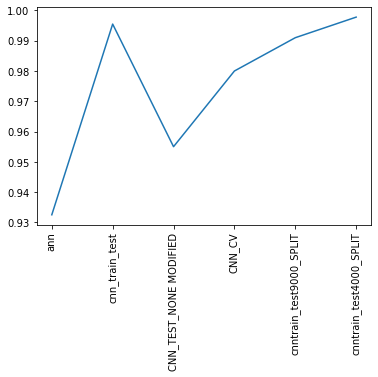

In [547]:
plt.plot(algo,accuracy)
plt.xticks(rotation=90)